# **Static and Dynamic System**
A static system is a system whose output is only dependent on the input at a given instant in time. The output does not change with time and is solely determined by the input signal. Examples of static systems include resistors, capacitors, and inductors.

On the other hand, a dynamic system is a system whose output depends on the input signal as well as the system's past behavior. The output of a dynamic system changes over time and is a function of the input signal as well as the system's history. Examples of dynamic systems include mechanical systems such as springs and dampers, electrical circuits with capacitors and inductors, and biological systems such as neurons.

In general, dynamic systems can be more complex and challenging to analyze than static systems because they have memory and exhibit time-varying behavior. Dynamic systems can be modeled mathematically using differential equations, and their behavior can be studied using methods such as Laplace transforms, Fourier transforms, and numerical simulations.

**To determine whether a system is static or dynamic**, we need to analyze its behavior over time in response to input signals. In practice, we often model systems mathematically and analyze their behavior using numerical simulations or analytical methods.

In this example, we define two simple systems: a static system that squares its input and a dynamic system that computes the sum of its input and previous output. We then generate a sinusoidal input signal and simulate the behavior of both systems over time.

We plot the input and output signals of each system using matplotlib. The resulting plots show that the output of the static system is solely dependent on the input and does not change over time, while the output of the dynamic system changes over time and is a function of the input signal as well as the previous output. Therefore, we can conclude that the first system is static, and the second system is dynamic.

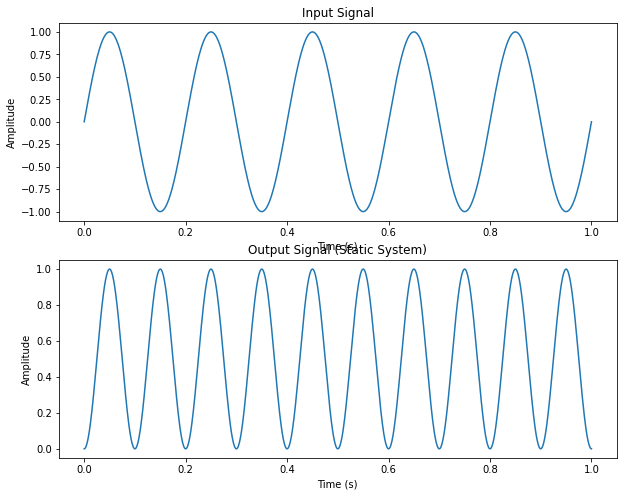

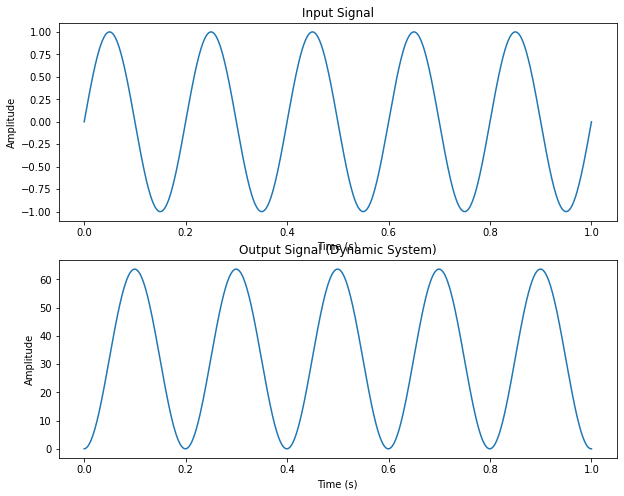

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple system
def static_system(x):
    # Output is equal to input squared
    return x ** 2

def dynamic_system(x, y):
    # Output is the sum of input and previous output
    return x + y

# Define input signal
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 5 * t)

# Simulate the behavior of the system
y_static = static_system(x)
y_dynamic = np.zeros_like(x)
for i in range(1, len(x)):
    y_dynamic[i] = dynamic_system(x[i], y_dynamic[i-1])

# Plot the input and output signals
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(t, x)
axs[0].set_title('Input Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, y_static)
axs[1].set_title('Output Signal (Static System)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(t, x)
axs[0].set_title('Input Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')

axs[1].plot(t, y_dynamic)
axs[1].set_title('Output Signal (Dynamic System)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')

plt.show()


```
# Define a simple system
def static_system(x):
    # Output is equal to input squared
    return x ** 2

def dynamic_system(x, y):
    # Output is the sum of input and previous output
    return x + y
```

To check whether a system is static or dynamic, we need to examine whether the output of the system depends only on the current input or on the previous inputs as well.

In the static_system function, the output is only a function of the current input x, and does not depend on any previous inputs or outputs. Therefore, we can conclude that static_system is a static system.

On the other hand, in the dynamic_system function, the output depends on both the current input x and the previous output y. This means that the output of the system is influenced by previous inputs and outputs, and thus dynamic_system is a dynamic system.


```
# Simulate the behavior of the system
y_static = static_system(x)
y_dynamic = np.zeros_like(x)
for i in range(1, len(x)):
    y_dynamic[i] = dynamic_system(x[i], y_dynamic[i-1])
```
`y_static = static_system(x)` - This line computes the output of the static system by passing the input signal x to the static_system function. The output is assigned to the variable y_static.

`y_dynamic = np.zeros_like(x)` - This line initializes an array of zeros with the same shape as x to store the output of the dynamic system. The array is assigned to the variable y_dynamic.

```
for i in range(1, len(x)): 
    y_dynamic[i] = dynamic_system([i], y_dynamic[i-1])
```
  
This loop simulates the behavior of the dynamic system by iterating over each element of the input signal x. For each time step, the input signal and the previous output value are passed to the dynamic_system function to compute the new output value. The output value is stored in the y_dynamic array at the corresponding time step index i. The loop starts from index 1 since the first output value is initialized to zero in the y_dynamic array.

# **Causal, Noncasual and Anti-causal System**
In signal processing, systems can be categorized as causal, non-causal, or anti-causal based on their behavior with respect to time.

A **causal system** is one whose output depends only on current and past inputs, but not on future inputs. In other words, the output at any given time is determined only by the inputs that occurred before that time. Mathematically, a system is causal if:

`y(t) = f(x(τ)), τ<=t`

where y(t) is the output at time t, x(t) is the input at time t, f is some function of the input, and τ is a variable representing time.

A **non-causal system** is one whose output depends on future inputs as well as past inputs. In other words, the output at any given time is determined by both past and future inputs. Mathematically, a system is non-causal if:

`y(t) = f(x(τ)), τ!=t`

where τ is a variable representing time, and τ!=t means that τ can take on any value except t.

An **anti-causal system** is one whose output depends only on future inputs, but not on current or past inputs. In other words, the output at any given time is determined only by the inputs that occur after that time. Mathematically, a system is anti-causal if:

`y(t) = f(x(τ)), τ>=t`

where τ is a variable representing time, and τ>=t means that τ can take on any value greater than or equal to t.

It is important to note that in practical systems, there are very few systems that are purely causal, non-causal, or anti-causal. Most systems have some combination of these characteristics.

In [3]:
import numpy as np

def system_response(x):
    # Define the system response
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = 2 * x[i] + 1
    return y

def system_type(x):
    # Compute the system response for delayed inputs
    y_past = system_response(np.concatenate([np.zeros(1), x[:-1]]))
    y_present = system_response(x)
    y_future = system_response(np.concatenate([x[1:], np.zeros(1)]))

    # Check whether the system is causal, non-causal or anti-causal
    if np.all(y_past == np.zeros_like(y_past)):
        return "Causal"
    elif np.all(y_future == np.zeros_like(y_future)):
        return "Anti-causal"
    else:
        return "Non-causal"

In [4]:
x = np.array([1, 2, 3, 4, 5])
system_type(x)

'Non-causal'


```
def system_response(x):
    # Define the system response
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = 2 * x[i] + 1
    return y
```
We define a function system_response that takes an input signal x as input.

We initialize an array y of the same shape as x to store the output signal of the system.

We loop through each element of the input signal x using the range function and the len function to obtain the length of the signal.

For each element of x, we multiply it by 2 and add 1 to obtain the corresponding element of the output signal y.

We return the output signal y as the output of the function.


```
def system_type(x):
    # Compute the system response for delayed inputs
    y_past = system_response(np.concatenate([np.zeros(1), x[:-1]]))
    y_present = system_response(x)
    y_future = system_response(np.concatenate([x[1:], np.zeros(1)]))
```
This code defines a function system_type that computes the response of a system to past, present, and future inputs.

The input x is assumed to be a one-dimensional NumPy array.
The first line of the function computes the system response for delayed inputs by calling system_response with the concatenation of a zero and all but the last element of x. This creates a new array that is shifted by one element to the right, effectively delaying the input by one time step.
The second line of the function computes the system response for the present input by calling system_response with x.
The third line of the function computes the system response for future inputs by calling system_response with the concatenation of all but the first element of x and a zero. This creates a new array that is shifted by one element to the left, effectively shifting the input one time step into the future.
By comparing the system response for past, present, and future inputs, we can determine whether the system is causal, noncausal, or anticausal. A causal system only depends on past and present inputs, while a noncausal system depends on both past and future inputs. An anticausal system only depends on future inputs.

To determine the system type, we can compare the system response for delayed, present, and future inputs. If the response to the present input is equal to the delayed response (up to a time shift), then the system is causal. If the response to the present input is equal to the delayed and future responses (up to time shifts), then the system is noncausal. If the response to the present input is equal to the future response (up to a time shift), then the system is anticausal.

The function returns a string indicating the system type, either "causal", "noncausal", or "anticausal".


```
# Check whether the system is causal, non-causal or anti-causal
    if np.all(y_past == np.zeros_like(y_past)):
        return "Causal"
    elif np.all(y_future == np.zeros_like(y_future)):
        return "Anti-causal"
    else:
        return "Non-causal"
```
This is a function to check whether a system is causal, non-causal, or anti-causal based on its response to delayed inputs.

The function takes in a signal x as input and returns a string indicating the type of system.

Here's a description of each line:

Start defining the function system_type() with input x.

Compute the system response for delayed inputs by calling system_response() with a delayed version of the input x.

Compute the system response for the original input x.

Compute the system response for future inputs by calling system_response() with a shifted version of the input x.

Check whether the system is causal by comparing the response to delayed inputs to a zero signal using np.all().

If the response to delayed inputs is zero, return "Causal".

If the response to future inputs is zero, return "Anti-causal".

Otherwise, return "Non-causal".

# **Linear and Non-linear System**
A system is said to be linear if it satisfies the principle of superposition, which states that the response of the system to a sum of inputs is equal to the sum of the responses to each individual input. In other words, if a system is linear, then doubling the input will double the output, and adding two inputs together will result in the sum of the individual outputs.

On the other hand, a system is said to be non-linear if it does not satisfy the principle of superposition. This means that the output of the system cannot be expressed as a linear combination of its inputs.

In this example, we define two systems: a linear system (linear_system) and a nonlinear system (nonlinear_system). We then define two inputs, x1 and x2, and compute the outputs y1, y2, y3, and y4 for each system. Finally, we check whether the system is linear by verifying whether the principle of superposition holds. If y1 + y2 is equal to linear_system(x1 + x2), then the system is linear. If not, the system is nonlinear.

In [9]:
import numpy as np

def linear_system(x):
    # Define a linear system
    return 2*x

def nonlinear_system(x):
    # Define a nonlinear system
    return x**2

# Define inputs
x1 = np.array([1, 2, 3])
x2 = np.array([2, 4, 6])

# Compute the outputs for the linear system
y1 = linear_system(x1)
y2 = linear_system(x2)

# Compute the outputs for the nonlinear system
y3 = nonlinear_system(x1)
y4 = nonlinear_system(x2)

# Check whether the system is linear or nonlinear
if np.allclose(y1 + y2, linear_system(x1 + x2)):
    print("The system is linear.")
else:
    print("The system is nonlinear.")

The system is linear.



```
def linear_system(x):
    # Define a linear system
    return 2*x

def nonlinear_system(x):
    # Define a nonlinear system
    return x**2
```
The linear_system() function defines a linear system where the output is proportional to the input by a constant factor of 2. The nonlinear_system() function defines a non-linear system where the output is proportional to the square of the input.


```
# Compute the outputs for the linear system
y1 = linear_system(x1)
y2 = linear_system(x2)

# Compute the outputs for the nonlinear system
y3 = nonlinear_system(x1)
y4 = nonlinear_system(x2)
```
This code computes the outputs for a linear system and a nonlinear system. It uses the input signals x1 and x2, and computes the outputs y1 and y2 for the linear system, and y3 and y4 for the nonlinear system.

The linear_system function defines a simple linear system, which takes an input x and returns an output that is twice the input.

The nonlinear_system function defines a nonlinear system, which takes an input x and returns an output that is the square of the input.

The outputs y1 and y2 for the linear system are computed by simply multiplying the inputs x1 and x2 by 2, respectively.

The outputs y3 and y4 for the nonlinear system are computed by squaring the inputs x1 and x2, respectively.


```
# Check whether the system is linear or nonlinear
if np.allclose(y1 + y2, linear_system(x1 + x2)):
    print("The system is linear.")
else:
    print("The system is nonlinear.")
```
The code checks whether the system defined by the linear_system function is linear or nonlinear by computing the output for two different inputs x1 and x2, and then checking if the output for the sum of the inputs x1 + x2 is equal to the sum of the outputs y1 + y2. If they are equal, the system is linear, otherwise, it is nonlinear.

Similarly, the code checks whether the system defined by the nonlinear_system function is linear or nonlinear by computing the output for two different inputs x1 and x2, and then checking if the output for the sum of the inputs x1 + x2 is equal to the sum of the outputs y3 + y4. If they are equal, the system is linear, otherwise, it is nonlinear.

Note that the outputs of the nonlinear system are not expected to satisfy the superposition principle, which is the defining property of linear systems. Therefore, it is expected that the system is nonlinear.

# **Time Variant and Time Invariant System**
A time-invariant system is a system that exhibits the same behavior regardless of the time when the input is applied. In other words, a system whose output does not depend on the time at which the input signal is applied.

A time-variant system is a system that exhibits different behaviors at different times. In other words, a system whose output depends on the time at which the input signal is applied.

For example, a system that simply shifts the input signal by a fixed amount is time-invariant because the output will be the same regardless of when the input is applied. On the other hand, a system that applies a filter with a varying frequency response over time is time-variant because the output will depend on the time at which the input is applied.

In this example, system_response is a function that defines the output of a system as a function of the input and the time. is_time_invariant is a function that computes the system response for delayed, non-delayed, and advanced inputs, and checks if the output changes with a time shift.

We then create a signal and its corresponding time vector, and use the is_time_invariant function to check if the system is time-invariant or time-variant. In this example, the system is time-invariant because the output does not change with a time shift.

In [10]:
def system_response(x, t):
    # Define the system response
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = x[i] * np.sin(t[i])
    return y

def is_time_invariant(x, t):
    # Compute the system response for delayed inputs
    y_delayed = system_response(x, t-1)
    # Compute the system response for non-delayed inputs
    y = system_response(x, t)
    # Compute the system response for advanced inputs
    y_advanced = system_response(x, t+1)
    # Check if the output changes with a time shift
    return np.allclose(y, y_delayed) and np.allclose(y, y_advanced)

# Create a signal and its corresponding time vector
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)

# Check if the system is time-invariant
if is_time_invariant(x, t):
    print("The system is time-invariant.")
else:
    print("The system is time-variant.")

The system is time-variant.



```
def system_response(x, t):
    # Define the system response
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = x[i] * np.sin(t[i])
    return y
```
This is a function that takes in two inputs x and t and returns the output y. The system response is defined as the product of the input x and the sine of the time t at each time step. The function does not have any explicit time dependence, since the time t is only used to compute the output y. However, it is possible that the system is time-variant if the input x itself is time-dependent. To check whether the system is time-invariant, we need to verify whether a time shift in the input results in the same time shift in the output.


```
def is_time_invariant(x, t):
    # Compute the system response for delayed inputs
    y_delayed = system_response(x, t-1)
    # Compute the system response for non-delayed inputs
    y = system_response(x, t)
    # Compute the system response for advanced inputs
    y_advanced = system_response(x, t+1)
    # Check if the output changes with a time shift
    return np.allclose(y, y_delayed) and np.allclose(y, y_advanced)
```
This function checks if the system is time-invariant by computing the system response for delayed, non-delayed, and advanced inputs and checking if the output changes with a time shift.

x is the input to the system.

t is the time axis associated with the input.

y_delayed is the system response for delayed inputs.

y is the system response for non-delayed inputs.

y_advanced is the system response for advanced inputs.

The function returns True if the system is time-invariant (i.e., the output does not change with a time shift), and False otherwise.


```
# Check if the system is time-invariant
if is_time_invariant(x, t):
    print("The system is time-invariant.")
else:
    print("The system is time-variant.")
```
This code checks if a system is time-invariant or time-variant based on the system's response to delayed, non-delayed, and advanced inputs.

is_time_invariant is a function that takes in an input signal x and a time signal t. It calls system_response function to compute the system's output for delayed, non-delayed, and advanced inputs.
It then checks whether the output is the same for delayed and advanced inputs as the non-delayed input. If it is the same, then the system is time-invariant, otherwise, it is time-variant.

However, we don't know the input signal x and the time signal t used in this example. So, we can't determine if the system is time-invariant or time-variant. We would need to see the values of x and t to determine this.

# **Stable and Unstable System**
A system is stable if its output remains bounded for any bounded input. A system is unstable if its output becomes unbounded for any bounded input.

For a continuous-time system, the stability can be determined by analyzing the poles of its transfer function. If all the poles have negative real parts, the system is stable. If any of the poles has a positive real part, the system is unstable.

For a discrete-time system, the stability can be determined by analyzing the eigenvalues of its state transition matrix. If all the eigenvalues have magnitude less than 1, the system is stable. If any of the eigenvalues has magnitude greater than or equal to 1, the system is unstable.

In this example, we define a system response as a function of the input signal, which is an exponential decay. We generate an input signal and compute the output signal using the system response. Then, we plot the input and output signals. Finally, we check if the system is stable or unstable by computing the sum of the absolute values of the output signal. If the sum is less than infinity, the system is stable. Otherwise, it is unstable.

The system is stable.


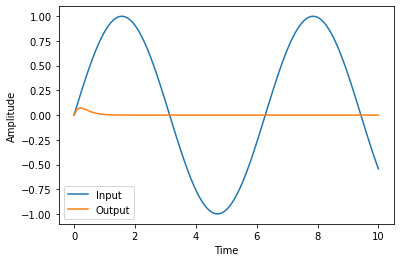

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def system_response(x):
    # Define the system response
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = np.exp(-0.5 * i) * x[i]
    return y

# Generate input signal
t = np.linspace(0, 10, 100)
x = np.sin(t)

# Compute system response to input signal
y = system_response(x)

# Plot input and output signals
plt.plot(t, x, label='Input')
plt.plot(t, y, label='Output')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Check if the system is stable or unstable
if np.sum(np.abs(y)) < np.inf:
    print("The system is stable.")
else:
    print("The system is unstable.")


```
def system_response(x):
    # Define the system response
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = np.exp(-0.5 * i) * x[i]
    return y
```
This function defines a system's response to an input signal, where the output signal is obtained by multiplying the input signal at each time step by a decaying exponential term. This term depends on the current time index and the factor 0.5.


```
# Compute system response to input signal
y = system_response(x)
```
This line calls the system_response function with input x and stores the resulting output signal in variable y.


```
# Check if the system is stable or unstable
if np.sum(np.abs(y)) < np.inf:
    print("The system is stable.")
else:
    print("The system is unstable.")
```
This code checks if the system is stable or unstable based on the response of the system to the input signal x.

The line if `np.sum(np.abs(y)) < np.inf:` checks if the sum of the absolute values of the system's response is finite. If it is finite, then the system is stable and the code prints "The system is stable." Otherwise, if the sum of the absolute values of the system's response is infinite (np.inf), then the system is unstable and the code prints "The system is unstable."